<a href="https://www.kaggle.com/code/tusharaggarwal27/medical-insurance-premium-prediction?scriptVersionId=121164086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
          😷⚕️Medical Insurance Premium Prediction😷⚕️
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>
​
<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width:270px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>
​


<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this Project, I am building a model that predict the health insurance cost incurred by individuals based on theit age, gender, BMI, number of Children, smoking habits and geolocation </b>
  </div>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    <b>😷⚕️Medical Insurance Premium Prediction😷⚕️</b>
</p>
   <p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
    <b>Some thing to Note:</b><br>
    <br><br><b>1. </b><b>Features descriptions:</b>
 <br><u>sex</u>: insurance contractor gender.
<br><u>bmi</u>: body mass index(ideally 18.5 to 24.9).
<br><u>children</u>: number of children covered by health insurance/number of dependents.
<br><u>smoking</u>: smoking habits.
<br><u>region</u>: the benificiary's residential area in the U.S.. 
  <br><u>Target(output)-charges</u>: individual's medical cost billed by health insurer.
</p>


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Importing the required Liabraries
</p>

In [1]:
#Data manipulation imports
import numpy as np
import pandas as pd

#Data Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
#Additional imports
from math import sqrt

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Loading and checking data
</p>

In [2]:
data =pd.read_csv("/kaggle/input/insurance/insurance.csv", index_col=None)

In [3]:
print(data.head(11))

    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080


In [4]:
#Summary of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
#Summing all missing values accross all columns
print(data.isna().sum().sort_values(ascending=False))

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
#Statistical summary of data
print(data.describe(include='all'))

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Some EDA
</p>

<AxesSubplot:>

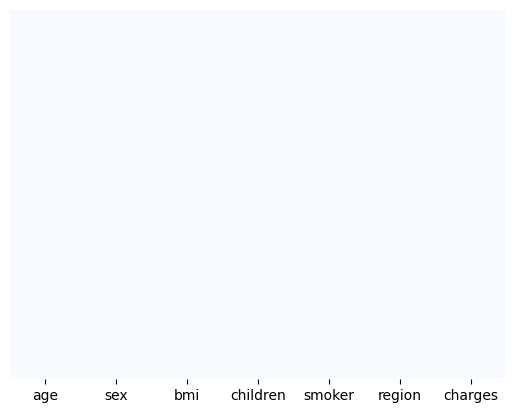

In [7]:
#Heatmap for missing values, if any
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='Blues' )

In [8]:
#Grouping by region and charges
df_region =data.groupby(by="region").mean().sort_values(by="charges",ascending=False)
print(df_region)

                 age        bmi  children       charges
region                                                 
southeast  38.939560  33.355989  1.049451  14735.411438
northeast  39.268519  29.173503  1.046296  13406.384516
northwest  39.196923  29.199785  1.147692  12417.575374
southwest  39.455385  30.596615  1.141538  12346.937377


In [9]:
#Grouping by age and charges
df_age = data.groupby(by="age").mean().sort_values(by='charges', ascending=False)
print(df_age[:5])

           bmi  children       charges
age                                   
64   32.976136  0.772727  23275.530837
61   32.548261  0.739130  22024.457609
60   30.332826  0.347826  21979.418507
63   31.923478  0.565217  19884.998461
43   30.204444  1.629630  19267.278653


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Some Feature engineering
</p>

In [10]:
#Unique/Distinct sex in data
print(data['sex'].unique())

['female' 'male']


In [11]:
#Conveting sex to numeric
data['sex']=data['sex'].apply(lambda x: 0 if x=="female" else 1)

In [12]:
#Unique/Distinct smoker in data
print(data['smoker'].unique())

['yes' 'no']


In [13]:
#Conveting smoker to numeric
data['smoker'] = data['smoker'].apply(lambda x: 0 if x=='no' else 1)

In [14]:
#Unique/Distinct region in data
print(data['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [15]:
#Converitng region to numeric
region_dummies = pd.get_dummies(data['region'], drop_first=True)

In [16]:
#Adding region_dummies to data
data = pd.concat([data, region_dummies], axis=1)

In [17]:
#Dropping region column
data.drop(['region'], axis=1, inplace=True)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Some Visuals
</p>

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

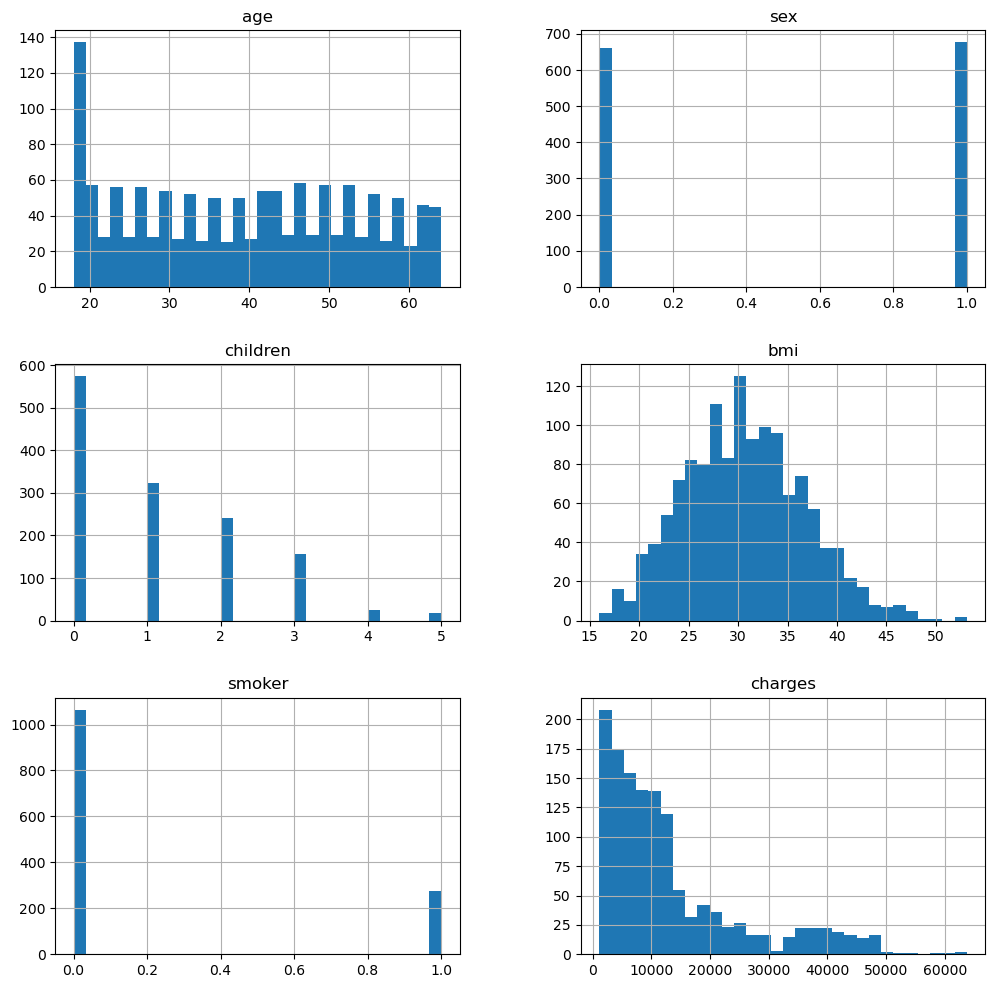

In [18]:
#Histogram of ['age', 'sex', 'children', 'bmi', 'smoker','charges']
data[['age', 'sex', 'children', 'bmi', 'smoker','charges']].hist(bins=30, figsize=(12,12))

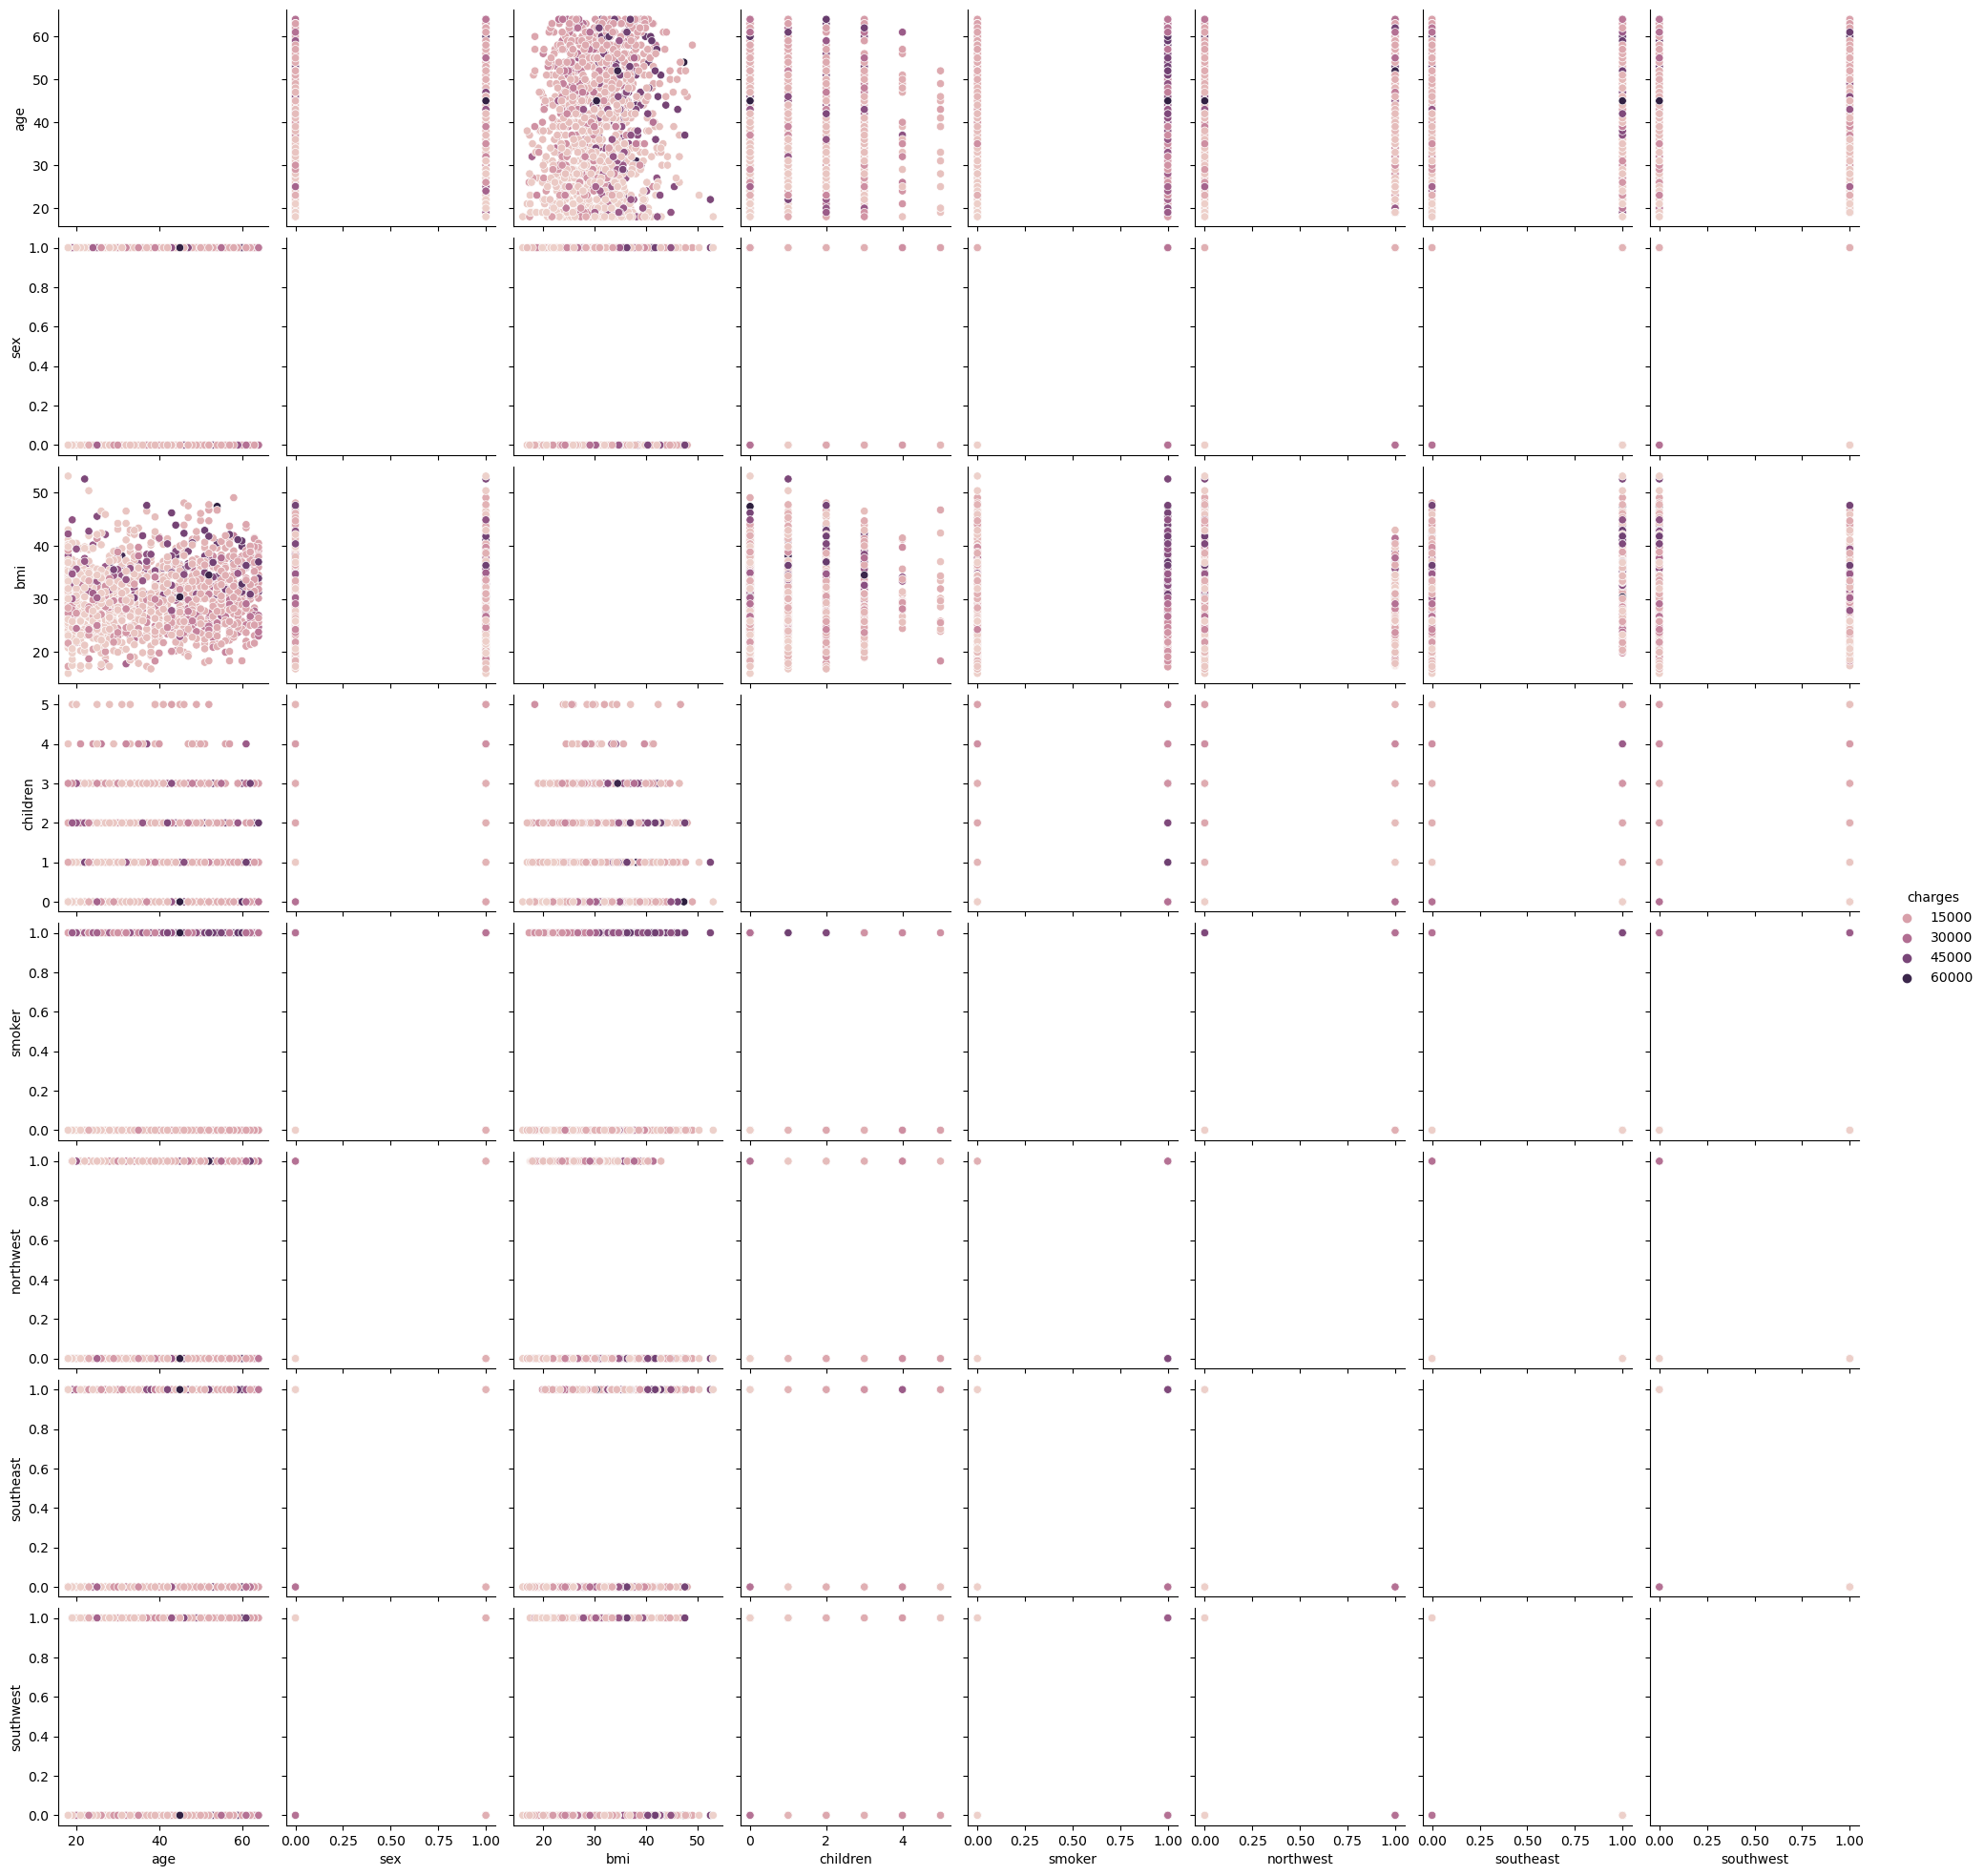

In [19]:
#Pairplots
sns.pairplot(data,hue='charges')

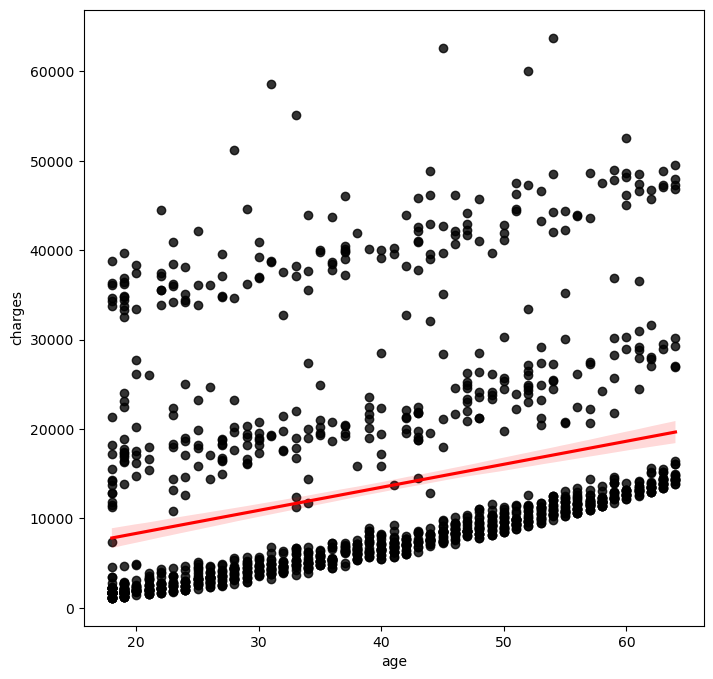

In [20]:
#Regplot for age and charges
plt.figure(figsize=(8,8))
sns.regplot(data=data, x='age', y='charges', scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

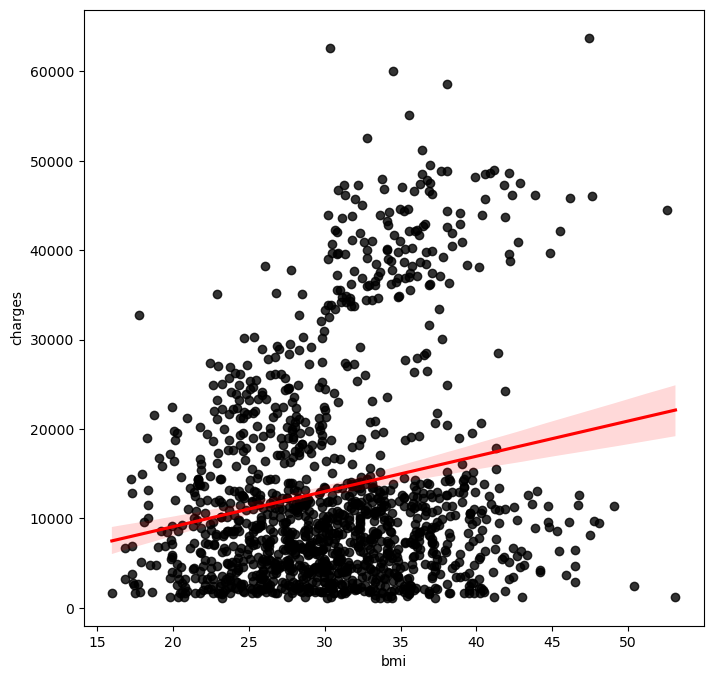

In [21]:
#Regplot for bmi and charges
plt.figure(figsize=(8,8))
sns.regplot(data=data, x='bmi', y='charges', scatter_kws={'color':'black'}, line_kws={'color':'red'})
plt.show()

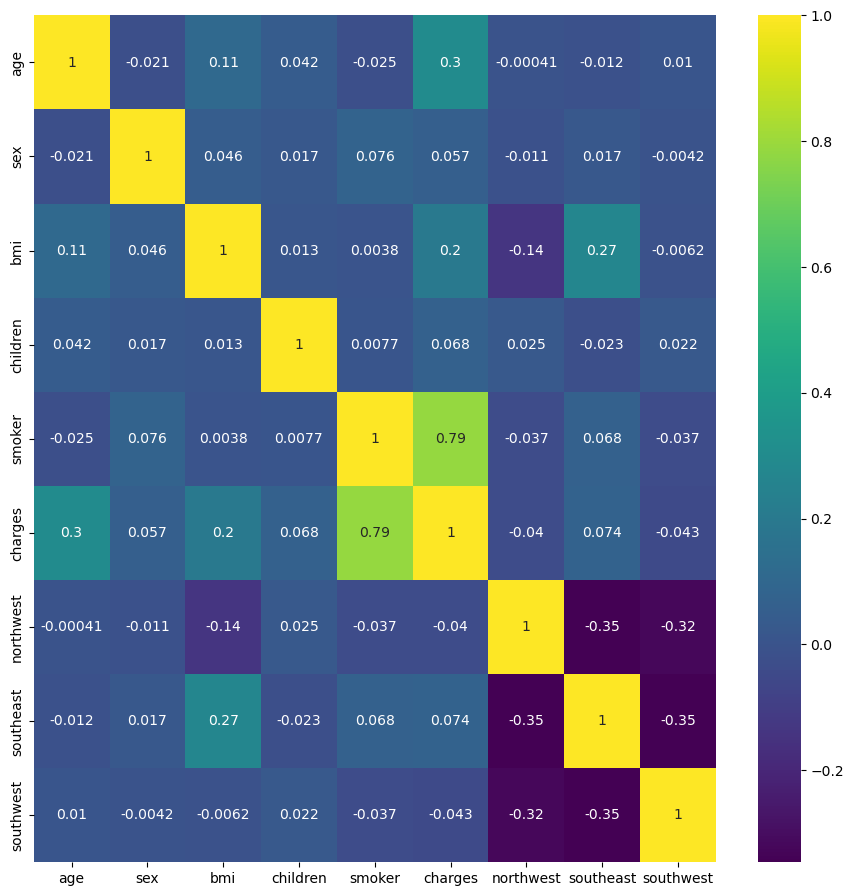

In [22]:
#Correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(data.corr(), cmap='viridis', annot=True)
plt.show()

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Now building for Models
</p>

In [23]:
#Setting features
X=data[['age', 'sex', 'bmi', 'children', 'smoker', 'northwest','southeast', 'southwest']]
#Setting target
y=data['charges']

In [24]:
#Converting into float32
X=np.array(X).astype('float32')
y=np.array(y).astype('float32')

In [25]:
#Reshaping y
y=y.reshape(-1,1)

In [26]:
#Scaling the data

scaler_x = StandardScaler()
X= scaler_x.fit_transform(X)

scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

In [27]:
#Splitting into train and test sets
X_train,X_test, y_train, y_test  = train_test_split(X,y, test_size=0.25, random_state=123)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Training Models
</p>

In [28]:
#LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [29]:
#Accuracy
linreg_accuracy = linreg.score(X_test, y_test)
print(linreg_accuracy)

0.7702236643719267


In [30]:
#y_pred
y_pred = linreg.predict(X_test)

In [31]:
#Inverse Transform
ori_pred = scaler_y.inverse_transform(y_pred)
ori_y_test = scaler_y.inverse_transform(y_test)

In [32]:
#Evaluation

RMSE = float(format(np.sqrt(mean_squared_error(ori_y_test, ori_pred)),'.3f'))
MSE = mean_squared_error(ori_y_test, ori_pred)
MAE =mean_absolute_error(ori_y_test, ori_pred)
r2 =r2_score(ori_y_test, ori_pred)
adj_r2 = 1-(1-r2)*((len(X_test))-1)/((len(X_test))-X_test.shape[1]-1)

print('RMSE=',RMSE,'\nMSE=',MSE,'\nMAE=',MAE, '\nr2=',r2, '\nadj_r2=',adj_r2 )

RMSE= 5788.568 
MSE= 33507526.0 
MAE= 4182.8613 
r2= 0.7702236773910166 
adj_r2= 0.764584994627606


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    ANN with dropout
</p>

In [33]:
ANN_model =keras.Sequential()
ANN_model.add(Dense(50, input_dim=8))
ANN_model.add(Activation("relu"))
ANN_model.add(Dense(150))
ANN_model.add(Activation("relu"))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation("relu"))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation("linear"))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mse', optimizer='adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [34]:
ANN_model.compile(loss='mean_squared_error', optimizer='adam')

In [35]:
#Fitting
epochs_hist =ANN_model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.6710 - val_loss: 0.3022
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3870 - val_loss: 0.2401
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3507 - val_loss: 0.2201
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2873 - val_loss: 0.1973
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2761 - val_loss: 0.2016
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2770 - val_loss: 0.2364
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2332 - val_loss: 0.1866
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2278 - val_loss: 0.1906
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2575 - val_loss: 0.2052
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2320 - val_loss: 0.1987
Epoch 11/

In [36]:
result = ANN_model.evaluate(X_test, y_test)
Accuracy_ANN = 1-result
print("Accuracy :{}".format(Accuracy_ANN))

11/11 [==============================] - 0s 1ms/step - loss: 0.1325
Accuracy :0.8675422966480255


In [37]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

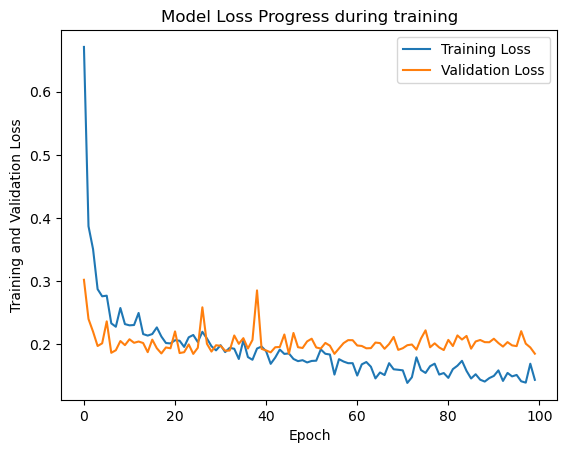

In [38]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss Progress during training")
plt.xlabel("Epoch")
plt.ylabel("Training and Validation Loss")
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


11/11 [==============================] - 0s 1ms/step


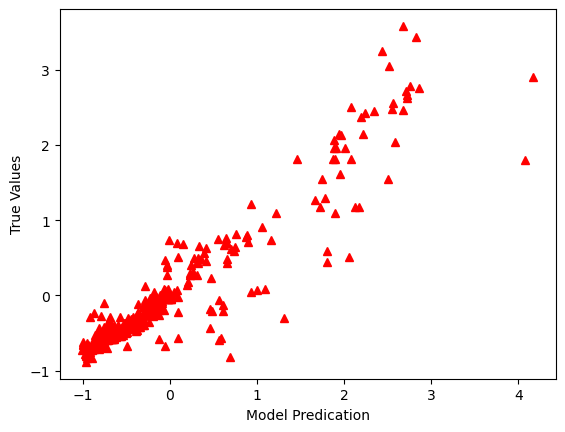

In [39]:
#Scaled "Model Predication" vs"True Values"
y_pred = ANN_model.predict(X_test)
plt.plot(y_test, y_pred, "^", color ='r')
plt.xlabel("Model Predication")
plt.ylabel("True Values")
plt.show()

In [40]:
y_pred_original =scaler_y.inverse_transform(y_pred)
y_test_original =scaler_y.inverse_transform(y_test)

11/11 [==============================] - 0s 1ms/step


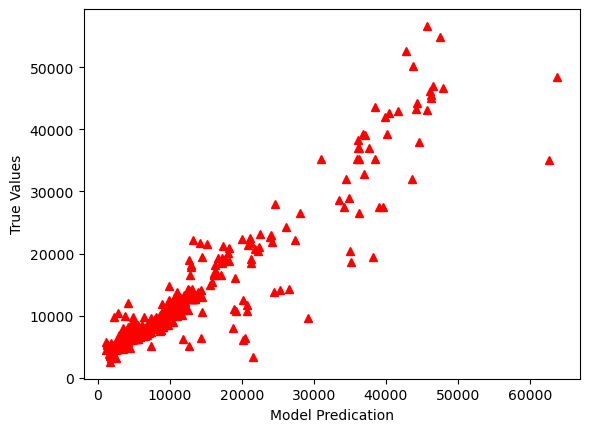

In [41]:
#Original "Model Predication" vs"True Values"
y_pred = ANN_model.predict(X_test)
plt.plot(y_test_original,y_pred_original, "^", color ='r')
plt.xlabel("Model Predication")
plt.ylabel("True Values")
plt.show()

In [42]:
#Evaluation

RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_pred_original)),'.3f'))
MSE = mean_squared_error(y_test_original, y_pred_original)
MAE =mean_absolute_error(y_test_original, y_pred_original)
r2 =r2_score(y_test_original, y_pred_original)
adj_r2 = 1-(1-r2)*((len(X_test))-1)/((len(X_test))-X_test.shape[1]-1)

print('RMSE=',RMSE,'\nMSE=',MSE,'\nMAE=',MAE, '\nr2=',r2, '\nadj_r2=',adj_r2 )

RMSE= 4405.76 
MSE= 19410720.0 
MAE= 2677.1365 
r2= 0.8668918848433402 
adj_r2= 0.8636254280296799


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    ANN with dropout works best out of above! App coming soon!
</p>